
# LINEAR REGRESSION to predict product sales volume and vehicle fuel economy





# PROBLEM STATEMENT

- You have been hired as a consultant to a major Automotive Manufacturer and you have been tasked to develop a model to predict the impact of increasing the vehicle horsepower (HP) on fuel economy (Mileage Per Gallon (MPG)). 
- Data set description:
    - Independant variable X: Vehicle Horse Power 
    - Dependant variable Y: Mileage Per Gallon (MPG) 

# LIBRARIES IMPORT


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# IMPORT DATASET

In [ ]:
fueleconomy_df = pd.read_csv('FuelEconomy.csv')

In [ ]:
fueleconomy_df.head(100)

,Horse Power,Fuel Economy (MPG)
0,118.770799,29.344195
1,176.326567,24.695934
2,219.262465,23.952010
3,187.310009,23.384546
4,218.594340,23.426739
...,...,...
95,162.810542,27.418661
96,266.869640,15.989945
97,243.831211,19.253375
98,140.959803,29.515593


In [ ]:
fueleconomy_df.describe()

,Horse Power,Fuel Economy (MPG)
count,100.000000,100.000000
mean,213.676190,23.178501
std,62.061726,4.701666
min,50.000000,10.000000
25%,174.996514,20.439516
50%,218.928402,23.143192
75%,251.706476,26.089933
max,350.000000,35.000000


In [ ]:
fueleconomy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Horse Power         100 non-null    float64
 1   Fuel Economy (MPG)  100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


# VISUALIZE DATASET

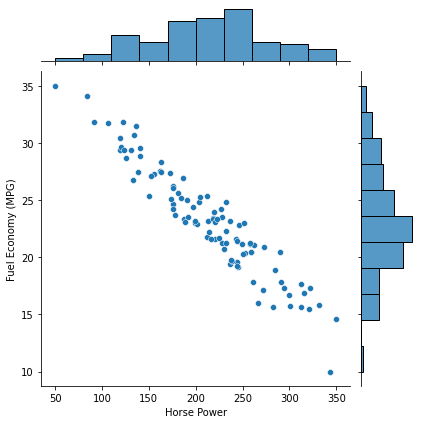

In [ ]:
sns.jointplot(x = 'Horse Power', y = 'Fuel Economy (MPG)', data = fueleconomy_df)

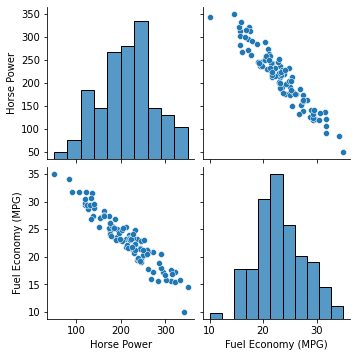

In [ ]:
sns.pairplot(fueleconomy_df)

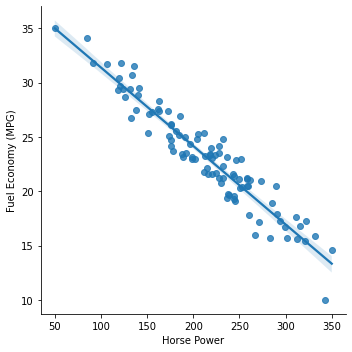

In [ ]:
sns.lmplot(x = 'Horse Power', y =  'Fuel Economy (MPG)', data = fueleconomy_df)

# CREATE TESTING AND TRAINING DATASET

In [ ]:
X = fueleconomy_df[['Horse Power']]

In [ ]:
y = fueleconomy_df['Fuel Economy (MPG)']

In [ ]:
X

,Horse Power
0,118.770799
1,176.326567
2,219.262465
3,187.310009
4,218.594340
...,...
95,162.810542
96,266.869640
97,243.831211
98,140.959803


In [ ]:
y

0     29.344195
1     24.695934
2     23.952010
3     23.384546
4     23.426739
        ...    
95    27.418661
96    15.989945
97    19.253375
98    29.515593
99    25.196097
Name: Fuel Economy (MPG), Length: 100, dtype: float64

In [ ]:
X.shape

(100, 1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [ ]:
X_train.shape

(70, 1)

In [ ]:
X_test.shape

(30, 1)

# STEP 5: TRAIN THE MODEL

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression(fit_intercept = True)
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
print('Linear Model Coeff (m):', regressor.coef_)
print('Linear Model Coeff (b):', regressor.intercept_)

Linear Model Coeff (m): [-0.07240164]
Linear Model Coeff (b): 38.64761970871443


In [ ]:
pip install statsmodels

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 96.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.7/233.7 KB 36.6 MB/s eta 0:00:00
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
# Use statsmodels to get a more detailed analysis of the regression model in Python

import statsmodels.api as sm

model = sm.OLS(y_train, X_train.assign(const=1))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Fuel Economy (MPG)   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     737.1
Date:                Sun, 17 Jul 2022   Prob (F-statistic):           3.23e-38
Time:                        16:11:07   Log-Likelihood:                -123.95
No. Observations:                  70   AIC:                             251.9
Df Residuals:                      68   BIC:                             256.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Horse Power    -0.0724      0.003    -27.150      0.000      -0.078      -0.067
const          38.6476      0.591     65.439      0.000      37.469      39.826
==============================================================================
Omnibus:                        0.790   Durbin-Watson:                   2.223
Prob(Omnibus):                  0.674   Jarque-Bera (JB):                0.818
Skew:                          -0.241   Prob(JB):                        0.664
Kurtosis:                       2.779   Cond. No.                         759.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# The variable Horse Power is related to the output with significance (P < 0.05)

# TEST THE MODEL 

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

y_pred = regressor.predict(X_test)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f'RMSE: {RMSE:.0f}')
print(f'r2: {r2:.4f}')

RMSE: 1
r2: 0.8891


Text(0.5, 1.0, 'HP vs. MPG (Training Set)')

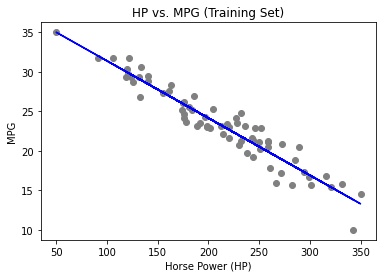

In [ ]:
plt.scatter(X_train, y_train, color = 'gray')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.xlabel('Horse Power (HP)')
plt.ylabel('MPG')
plt.title('HP vs. MPG (Training Set)')

Text(0.5, 1.0, 'HP vs. MPG (Testing Set)')

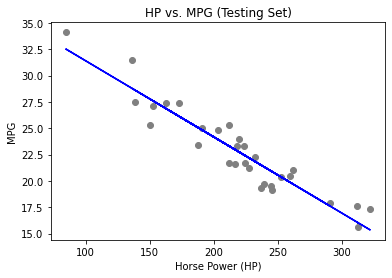

In [ ]:
plt.scatter(X_test, y_test, color = 'gray')
plt.plot(X_test, regressor.predict(X_test), color = 'blue')
plt.xlabel('Horse Power (HP)')
plt.ylabel('MPG')
plt.title('HP vs. MPG (Testing Set)')

In [ ]:
# If HP is 500, what is the MPG?

HP = np.array(500)

HP = HP.reshape(1,-1)

In [ ]:
MPG = regressor.predict(HP)
MPG

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([2.44679804])

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=52c36416-830a-46f9-8b9e-cd6ea1847ee2' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>